In [905]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import requests
from io import StringIO
import matplotlib.pyplot as plt 

In [906]:
import talib
from talib import MA_Type

In [907]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [908]:
def pyramid(n):
    for i in range(1,n+1):
        print(" "*(n-i) + (i*2-1)*"*")
    for i in range(1,n):
        print(" "*(i) + "*"*((-i+(n))*2-1))

pyramid(10)

         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
*******************
 *****************
  ***************
   *************
    ***********
     *********
      *******
       *****
        ***
         *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [909]:
a = open("symbols01.txt","r")
data_a = a.readlines()              #依序讀取每行
b = open("symbols02.txt","r")
data_b = b.readlines() 

In [910]:
for i in range(0,len(data_a)):
    data_a[i] = data_a[i].replace("\n","")     #將\n刪掉
for i in range(0,len(data_b)):
    data_b[i] = data_b[i].replace("\n","")

In [911]:
data_c = set(data_a + data_b)

In [912]:
with open('symbols03.txt', 'w') as f:             #存取symbols03.txt
    for symbol in data_c:
        f.write(symbol.strip().upper() + "\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [913]:
url = "http://dts.twse.com.tw/opendata/t187ap03_L.csv"
r = requests.get(url)

In [914]:
r.encoding = "BIG5"

In [917]:
company_data = pd.read_csv(StringIO(r.text) , header=1)
company_data.head(1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN


In [918]:
company_data.columns = ['公司名稱', '產業別', '住址', '營利事業統一編號', '董事長'
                        , '總經理', '發言人', '發言人職稱','代理發言人', '總機電話"'
                        , '成立日期', '上市日期', '普通股每股面額', '實收資本額', '私募股數'
                        , '特別股','編制財務報表類型', '股票過戶機構', '過戶電話', '過戶地址'
                        , '英文簡稱', '英文通訊地址', '傳真機號碼','電子郵件信箱', '網址' , '空的']
company_data = company_data.drop('空的',axis = 1)            #重新命名行頭來對齊，並刪除最後一行

In [919]:
company_data.head(1)

,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,"總機電話""",...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [920]:
df = data['GOOG']

In [921]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700


In [922]:
# 計算均線
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()

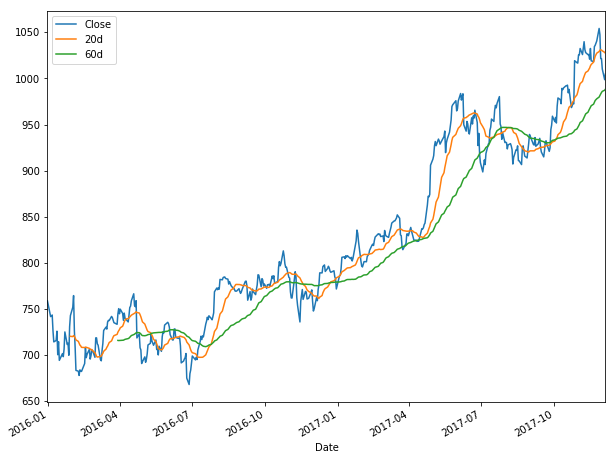

In [923]:
df[['Close', '20d', '60d']].plot(legend='best', figsize=(10,8))

In [924]:
#計算MACD
#快線 (DIF) 向上突破 慢線 (MACD) → 買進訊號
#快線 (DIF) 向下跌破 慢線 (MACD) → 賣出訊號
macd, macdsignal, macdhist = talib.MACD(df["Close"].values, fastperiod=12, slowperiod=26, signalperiod=9)

In [925]:
df["DIF"] = macd

In [926]:
df["MACD"] = macdsignal

In [927]:
df["DIF-MACD"] = macdhist

C:\Users\TheOne\Anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


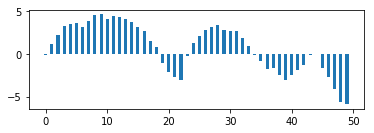

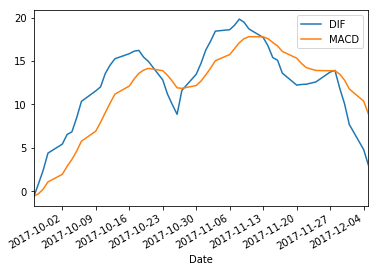

In [928]:
plt.subplot(212)
plt.bar(left = range(0,50) , height = df["DIF-MACD"][-50:].values , width = 0.5 , align="center")
df[['DIF', 'MACD']][-50:].plot(legend='best')

In [929]:
#計算OBV - On Balance Volume 能量潮指標
float_volume = [float(x) for x in df["Volume"].values]
np_float_volume = np.array(float_volume)                      #將Volume變成浮動
obv = talib.OBV(df["Close"].values , np_float_volume)

In [930]:
df["OBV"] = obv

C:\Users\TheOne\Anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


<Container object of 50 artists>

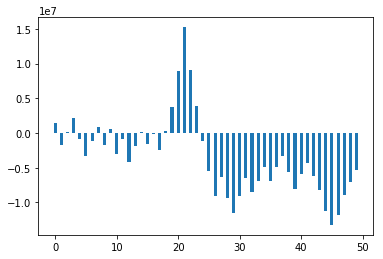

In [931]:
plt.bar(left = range(0,50) , height = df["OBV"][:50].values , width = 0.5 , align="center")

# Q5. 策略回測

In [932]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [933]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [934]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [935]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [936]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [937]:
# 跳空

def B034030054_strategy(df):
    df['DIF'], df['MACD'], df['DIF-MACD'] = talib.MACD(df["Close"].values, fastperiod=12, slowperiod=26, signalperiod=9)
    df['5MA'] = pd.Series.rolling(df['Close'], window=5).mean()
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Low'][t] > df['High'][t-1] and df['Close'][t] > df['Open'][t] and df['Volume'][t] > df['Volume'][t-1]*1.2:
            #當天為紅棒且跳空，成交量比前一天多20%
        #if df['Close'][t-1] < df['Close'][t-2] and df['Close'][t-2] < df['Close'][t-3] and df['Close'][t] > df['Open'][t] and df['Volume'][t] > df['Volume'][t-1]*1.5:
        #if df['Close'][t] > df['Open'][t] and df['Close'][t] > np.nanmax((df['Low'][t-1],df['Low'][t-2],df['Low'][t-3],df['Low'][t-4],df['Low'][t-5])):
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['5MA'][t]:
            #當購買後的收盤價小於5M，則賣出
        #elif df['DIF-MACD'][t] < 0 and df['DIF-MACD'][t-1] > 0:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
    
    df['positions'] = df['signals'].cumsum().shift()
    return df

In [938]:
def apply_strategy(strategy, df):
    return strategy(df)

In [939]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, B034030054_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

Symbol: UTMD 使用 B034030054_strategy 策略沒有出現買賣訊號。


In [940]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [941]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,-1.093403,-0.029629,360,0.985956,705,3,TICC,B034030054_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [942]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
110,-1.674799,-0.003281,2,0.995803,705,2,NEWT,B034030054_strategy
72,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
73,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
23,4.131997,-0.016082,94,1.033598,705,3,TBNK,B034030054_strategy


In [943]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
77,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
89,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
